In [4]:
'''
Linear Regression
Theory
Linear Regression is a linear algorithm to analyze/predict relation between a dependent and one or many independent variables. Let’s take an example of house price. In this case price of the house is the dependent variable and factors like size of house, locality, season of purchase might act as independent variables. To start using LR or any other algorithm, first and foremost step is to generate a Hypothesis. For this tutorial, we would be using a default data set in Python. 
Python has a very nice library named sklearn which comes with many default data sets. We would be using boston house price data for this tutorial but before going for multiple variable problem, let’s start by taking just one dependent and one independent variable and writing codes without using any library.

Dependencies: sklearn,pandas,numpy and matplotlib libraries would be needed and it is recommended to install anaconda distribution where these libraries come as default
another recommendation is to create virtual environment in anaconda and then run the code. That is a nice practice as one can have different versions of python working together without any conflict
Let’s start the journey of linear Regression!!!
'''


In [ ]:
# Import these libraries
import numpy as np # python library for numerical functions 
import matplotlib # fro plotting the graphs
import matplotlib.pyplot as  plt
from matplotlib import style # to use different styles while plotting
import pandas as pd # for making data frames
import sklearn # python library for linear and other models
import warnings # to supress future warnings ( not related to model making)
from sklearn import linear_model
from sklearn.cross_validation import train_test_split # for train-test split
warnings.simplefilter(action = "ignore", category = FutureWarning)
%matplotlib inline

In [142]:
# Regression using one dependent and one independent variable
# To understand basics we will start with two dimension data that is only one independent variable and one dependent variable
xs=[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]
ys=[10,12,20,22,21,25,30,21,32,34,35,30,50,45,55,60,66,64,67,72,74,80,79,84]
len(xs),len(ys)

(24, 24)

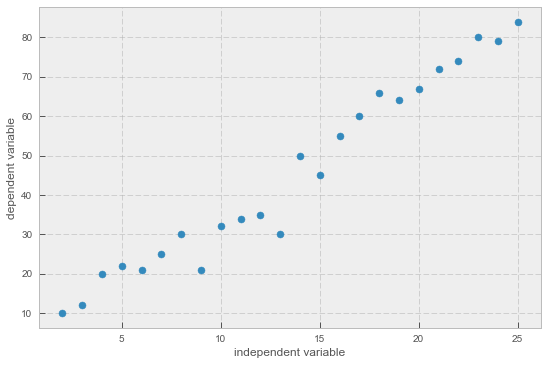

In [143]:
plt.scatter(xs,ys)
plt.ylabel("dependent variable")
plt.xlabel("independent variable")
plt.show()

# so we can see that dependent variable has a linear distribution with respect to independent variable

In [164]:
'''
now linear regression is a linear equation of line
y = mx + c where m is coefficient of independent variable and c is intercept. Befor going ahead and using sklearn to calculate linear 
model, lets explore the mathematics behind it using this two dimensional data
formula for coefficient or slope (m) :
(mean(x)*mean(y)-mean(x*y))/(mean(x)^2-mean(x^2))

formula for intercept (c) is: 
mean(y)-mean(x)*m

hence equation of line is : y= mx+c

'''
# lets write function for intercept and slope(coefficient)

def slope_intercept(x_val,y_val):
    x=np.array(x_val)
    y=np.array(y_val)
    m=( ( (np.mean(x)*np.mean(y)) - np.mean(x*y) ) /
       ((np.mean(x)*np.mean(x)) - np.mean(x*x))  )
    m=round(m,2)
    b=(np.mean(y) - np.mean(x)*m)
    b=round(b,2)
    
    return m,b



In [165]:
slope_intercept(xs,ys) # to see slope and intercept

(3.29, 0.92)

In [168]:
m,b=slope_intercept(xs,ys)

In [169]:
# eq of line 
reg_line=[(m*x)+b for x in xs]

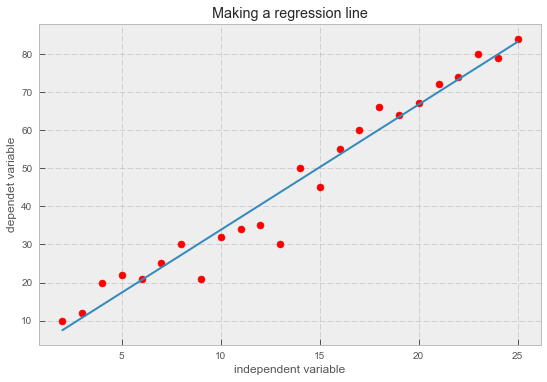

In [172]:
plt.scatter(xs,ys,color="red")
plt.plot(xs,reg_line)
plt.ylabel("dependet variable")
plt.xlabel("independent variable")
plt.title("Making a regression line")
plt.show()

In [174]:
# to calculate RMSE - root mean sqared error
'''
RMSE is a very common matrix to measure goodness of model, i.e how accurate our model is in predicting values.
Mathematics behind it is to draw a line of best fit in scattered data points so that that line has least error with respect to 
the actual data points. if Y is actual data point and Y is the predicted value by the equation of the line then error would be
= y-y_pred
but this has a bias towards sign as while adding positive and negative values would cancel each other and resultant error
would be less than the actual value. To overcome this, a general method is to take square which surves two purposes: 
1) Cancel out the effect of signs 
2) Penalize the error in prediction.

'''
def rmse(y1,y_hat):
    y_actual=np.array(y1)
    y_pred=np.array(y_hat)
    error=(y_actual-y_pred)**2
    error_mean=round(np.mean(error))
    err_sq=sqrt(error_mean)
    return err_sq

In [175]:
rmse(ys,reg_line)

4.58257569495584

In [ ]:
# now we can proceed further to make a model in relatively big data set having more than one independent variables.
#Sklearn comes with many default data sets and that list can be seen by using 
sklearn.datasets. # hit tab key

In [5]:
from sklearn.datasets import load_boston # getting the data, this data is about house price in boston area and its dependency on other variables

In [6]:
type(boston)# to know the type of data

sklearn.datasets.base.Bunch

In [7]:
df_x=pd.DataFrame(boston.data,columns=boston.feature_names) # making a data frame for independent variables


In [8]:
df_y=pd.DataFrame(boston.target) # making data frame of dependent variable or target


In [9]:
df_x.head(13)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [10]:
df_y.head(10)

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
5,28.7
6,22.9
7,27.1
8,16.5
9,18.9


In [11]:
df_x.describe() # this is a summary function

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [13]:
df_x.shape # to know number of row and columns

(506, 13)

In [25]:
names=[i for i in list(df_x)] # to get list of column names
names

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

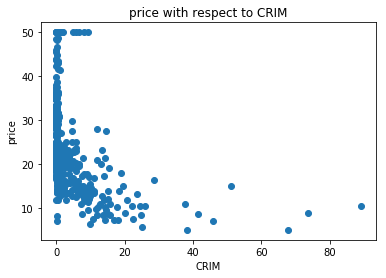

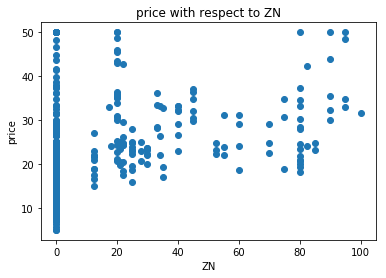

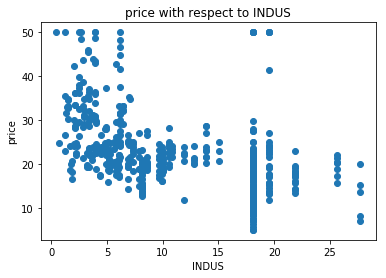

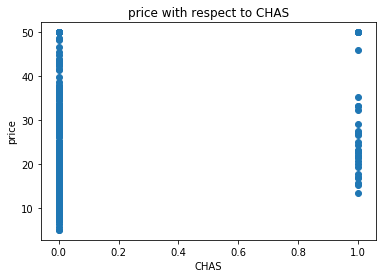

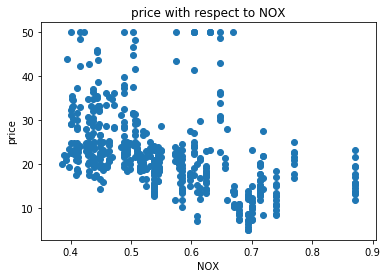

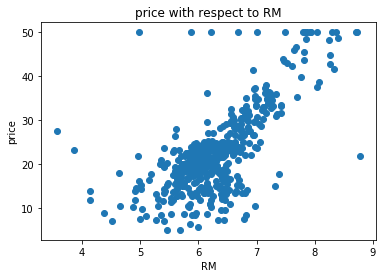

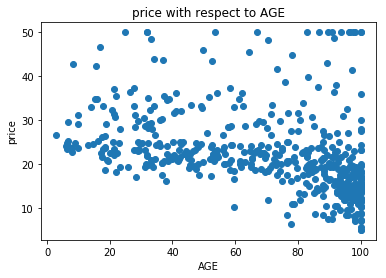

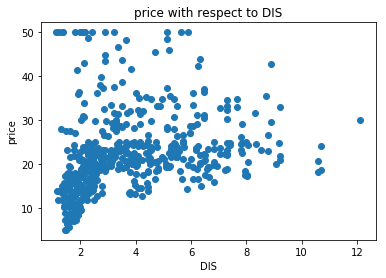

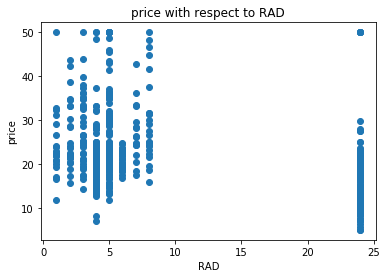

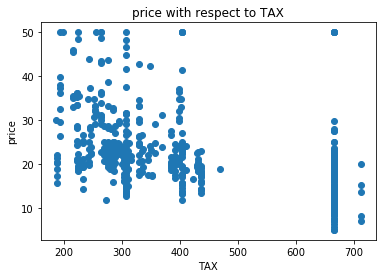

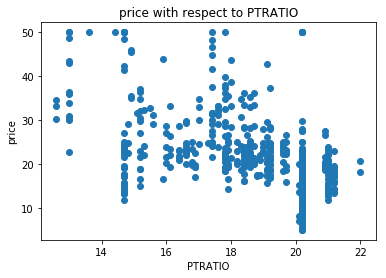

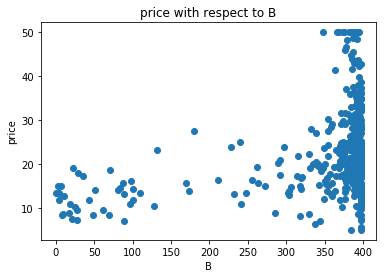

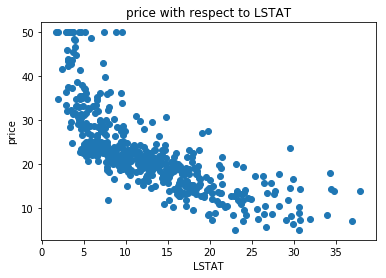

In [34]:
for i in names:
    plt.scatter(df_x[i],df_y)
    plt.xlabel(i)
    plt.ylabel("price")
    plt.title("price with respect to "+i)
    plt.show()
    # ploting effect on price by other variables separately

In [61]:
regr = linear_model.LinearRegression() # calling linear regression model


In [62]:
'''
This command is to split data in two parts i.e. train and test with test = 20 percent of total data
'''
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=4)


In [63]:
x_train.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
192,0.08664,45.0,3.44,0.0,0.437,7.178,26.3,6.4798,5.0,398.0,15.2,390.49,2.87
138,0.24980,0.0,21.89,0.0,0.624,5.857,98.2,1.6686,4.0,437.0,21.2,392.04,21.32
251,0.21409,22.0,5.86,0.0,0.431,6.438,8.9,7.3967,7.0,330.0,19.1,377.07,3.59
13,0.62976,0.0,8.14,0.0,0.538,5.949,61.8,4.7075,4.0,307.0,21.0,396.90,8.26
256,0.01538,90.0,3.75,0.0,0.394,7.454,34.2,6.3361,3.0,244.0,15.9,386.34,3.11


In [64]:
regr.fit(x_train,y_train) # making a linear regression model


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [176]:
regr.intercept_

array([ 35.60325757])

In [65]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(x_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x_test, y_test))

('Coefficients: \n', array([[ -1.14743504e-01,   4.70875035e-02,   8.70282354e-03,
          3.23818824e+00,  -1.67240567e+01,   3.87662996e+00,
         -1.08218769e-02,  -1.54144627e+00,   2.92604151e-01,
         -1.33989537e-02,  -9.07306805e-01,   8.91271054e-03,
         -4.58747039e-01]]))
Mean squared error: 25.41
Variance score: 0.73


In [105]:
rmse(y_test,regr.predict(x_test)) # to calculate root mean square error

5.0

In [177]:
reg.intercept_ # to get intercept (c) for the regression line

array([ 35.60325757])

In [82]:
#output of reg.coef_ comes as array and to get all coefficients ou as list we can use this co
reg.coef_[0].tolist() # these are the coefficients of independent variables(slope)  'm' for the regression line

[-0.11474350352784292,
 0.04708750352305251,
 0.008702823544638971,
 3.2381882373524027,
 -16.724056662483488,
 3.876629957608199,
 -0.010821876932426422,
 -1.541446269218063,
 0.29260415086770986,
 -0.013398953732595587,
 -0.9073068048891137,
 0.008912710541206792,
 -0.45874703942843986]

In [ ]:
len(reg.coef_[0].tolist())  # to see total number of coefficients

In [84]:
pd.DataFrame(zip(names,reg.coef_[0].tolist()),columns=["names","coefficient"]) # attaching slopes to respective independent variables

,names,coefficient
0,CRIM,-0.114744
1,ZN,0.047088
2,INDUS,0.008703
3,CHAS,3.238188
4,NOX,-16.724057
5,RM,3.876630
6,AGE,-0.010822
7,DIS,-1.541446
8,RAD,0.292604
9,TAX,-0.013399


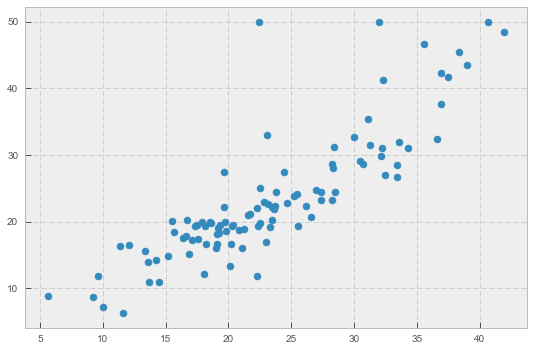

In [127]:
style.use("bmh")
plt.scatter(regr.predict(x_test),y_test)
plt.show()

In [178]:
 ## additional informations- matplotlib comes with many default styles in which a plot can be plotted and it can be seen as 
style.available 
# to use this just add a line in plot- style.use("name of style")


[u'seaborn-darkgrid',
 u'seaborn-notebook',
 u'classic',
 u'seaborn-ticks',
 u'grayscale',
 u'bmh',
 u'seaborn-talk',
 u'dark_background',
 u'ggplot',
 u'fivethirtyeight',
 u'seaborn-colorblind',
 u'seaborn-deep',
 u'seaborn-whitegrid',
 u'seaborn-bright',
 u'seaborn-poster',
 u'seaborn-muted',
 u'seaborn-paper',
 u'seaborn-white',
 u'seaborn-pastel',
 u'seaborn-dark',
 u'seaborn',
 u'seaborn-dark-palette']

In [180]:
# to find importance of variables in model and select only important variables for the model
'''
Sklearn is a good way to plot a linear regression but if we are considering linear regression for a modelling then apart from 
the equation of line it is very important to know the importance of variables (significance) with respect to the hypothesis
For testing this we calculate P value for each variable and if it is less than the desired cutoff( 0.05 is a general cutoff
for 95% significance) then we can say with confidence that a variable is significance
To test this, python as another library 'statsmodels' which is precisely for statistical modelling and in that we can have 
summary of the model to see p values and significance of variables
'''
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [220]:
model1=sm.OLS(y_train,x_train) # ordianry least square method ( or linear least square) is a general approach for linear regression and we have covered the theory of this in the first segment of this tutorial 

In [221]:
result=model1.fit()

In [222]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      0   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     711.8
Date:                Sun, 16 Apr 2017   Prob (F-statistic):          8.37e-263
Time:                        21:23:08   Log-Likelihood:                -1210.8
No. Observations:                 404   AIC:                             2448.
Df Residuals:                     391   BIC:                             2500.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
CRIM          -0.1077      0.039     -2.779      0.0

In [185]:
# we can drop few variables and select only those who have a p values < 0.5. Then we can check the improvement in model
# To compare two different models, a general approach is AIC- Akaike information criteria and the model with minimum AIC is the best
# One important this regarding AIC is that it compares similar models only- we can't compare regression with logistic regression model
model2=sm.OLS(y_train,x_train[['CRIM','ZN','CHAS','RM','DIS','RAD','TAX','PTRATIO','B','LSTAT']])
result2=model2.fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                      0   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     926.5
Date:                Sun, 16 Apr 2017   Prob (F-statistic):          1.08e-266
Time:                        20:40:51   Log-Likelihood:                -1212.1
No. Observations:                 404   AIC:                             2444.
Df Residuals:                     394   BIC:                             2484.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
CRIM          -0.1040      0.039     -2.695      0.0

In [ ]:
''' 
Further improvements
A very important concept which comes in play with almost all types of statistical models is 'Multicollinearity'
It is the correlation between two independent variables and thus interaction of those cause an impact on the relation between
variables and thus the model.
To check this, we need to find correlation between the independent variables and that can be done by this command
corr(method="name of method")

To see that as a visualization, we can make a correlation plot using seaborn ( another python library for plots) and it 
along with matplotlib,numpy,statsmodels,pandas comes in anaconda distribution
'''


--------------- CREATE A correlation plot ---------------


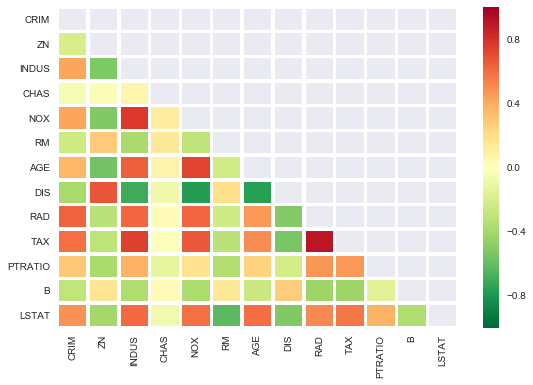

In [228]:
import seaborn
corr_df=x_train.corr(method='pearson')
print("--------------- CREATE A correlation plot ---------------")
# Create a mask to display only the lower triangle of the matrix (since it's mirrored around its 
# top-left to bottom-right diagonal).
mask = np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)] = True
# Create the heatmap using seaborn library. 
# List if colormaps (parameter 'cmap') is available here: http://matplotlib.org/examples/color/colormaps_reference.html
seaborn.heatmap(corr_df, cmap='RdYlGn_r', vmax=1.0, vmin=-1.0 , mask = mask, linewidths=2.5)
# Show the plot we reorient the labels for each column and row to make them easier to read.
plt.yticks(rotation=0) 
plt.xticks(rotation=90) 
plt.show()

In [ ]:
# since it is pearson coeffcient for correlation hence a values near to 1 or -1 would be showing high correlation.
# example AGE and DIS - we can drop either of these two variables and then re run the model to see if there is any improvement also we can create a new feature by taking the ratio or some other arithmatic function.
# in this way we deal correlation issues between dependent variables

